In [220]:
%pip install polars --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [221]:
import pandas as pd
import numpy as np

In [222]:
input_url = "s3://market-data-dev-142571790518/aggregated/market_prices"

In [223]:
df_raw = pd.read_parquet(input_url)

# Start from here

In [224]:
df = df_raw.copy()

In [225]:
df.sort_values(by=["processed_timestamp"], inplace=True)
df.reset_index(drop=True, inplace=True)
df["processed_timestamp"] = pd.to_datetime(df["processed_timestamp"])

# Let's check out the data

In [226]:
display(df.head())

,type_id,date,adjusted_price,average_price,processed_timestamp,source_path,avg_daily_price,min_daily_price,max_daily_price,record_count
0,19419,2025-04-05,8.271775e+07,8.000000e+07,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,8.271775e+07,8.271775e+07,8.271775e+07,2
1,20210,2025-04-05,1.024980e+06,9.989653e+05,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,1.024980e+06,1.024980e+06,1.024980e+06,2
2,46995,2025-04-05,0.000000e+00,1.053768e+07,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,0.000000e+00,0.000000e+00,0.000000e+00,2
3,27925,2025-04-05,0.000000e+00,1.905156e+08,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,0.000000e+00,0.000000e+00,0.000000e+00,2
4,21354,2025-04-05,2.954069e+01,2.628000e+01,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,2.954069e+01,2.954069e+01,2.954069e+01,2


In [238]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 361984 rows and 11 columns.


In [239]:
# Check for missing values
print("Missing values per column:")
print(df.isna().sum())

# Percentage of missing values
missing_percentage = df.isna().mean() * 100
print("Percentage of missing values:")
print(missing_percentage)

Missing values per column:
type_id                    0
date                       0
adjusted_price             0
average_price          47676
processed_timestamp        0
source_path                0
avg_daily_price            0
min_daily_price            0
max_daily_price            0
record_count               0
day_of_week                0
dtype: int64
Percentage of missing values:
type_id                 0.000000
date                    0.000000
adjusted_price          0.000000
average_price          13.170748
processed_timestamp     0.000000
source_path             0.000000
avg_daily_price         0.000000
min_daily_price         0.000000
max_daily_price         0.000000
record_count            0.000000
day_of_week             0.000000
dtype: float64


In [240]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
type_id,361984.0,33300.930737,18.0,15824.0,30389.0,46876.0,87840.0,22612.95009
adjusted_price,361984.0,174279029.695659,0.0,0.0,3318.714895,4895795.881465,122413205771.613205,2587211371.347984
average_price,314308.0,30742885.092471,0.01,133820.77,3127219.38,48000000.0,119799268.845,45641225.680969
processed_timestamp,361984,2025-04-11 16:04:22.553040640,2025-04-05 22:00:00,2025-04-08 22:00:00,2025-04-11 22:00:00,2025-04-14 10:00:00,2025-04-17 10:00:00,NaN
avg_daily_price,361984.0,174279029.695659,0.0,0.0,3679.770558,4985757.880552,122413205771.613205,2586029142.518668
min_daily_price,361984.0,172717449.562444,0.0,0.0,2901.125466,4763188.209074,122413205771.613205,2584009537.820632
max_daily_price,361984.0,175840609.828874,0.0,0.0,3714.050021,5010671.606215,122413205771.613205,2590408305.931353
record_count,361984.0,1.953133,1.0,2.0,2.0,2.0,2.0,0.211354


In [241]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


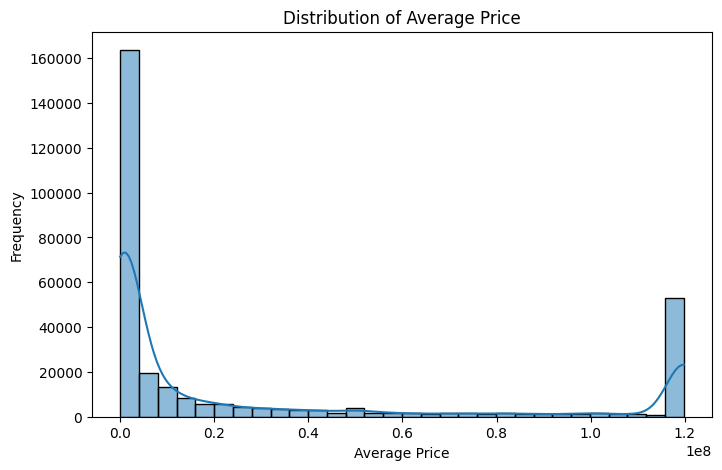

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of average_price
plt.figure(figsize=(8, 5))
sns.histplot(df['average_price'], kde=True, bins=30)
plt.title("Distribution of Average Price")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

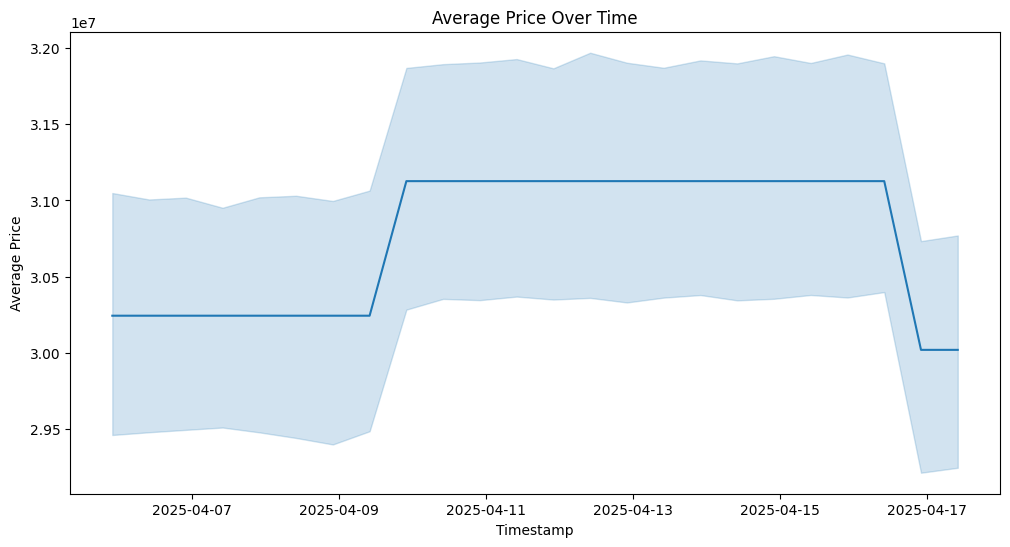

In [243]:
# Convert processed_timestamp to datetime if not already
df['processed_timestamp'] = pd.to_datetime(df['processed_timestamp'])

# Plot average price over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='processed_timestamp', y='average_price')
plt.title("Average Price Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Average Price")
plt.show()


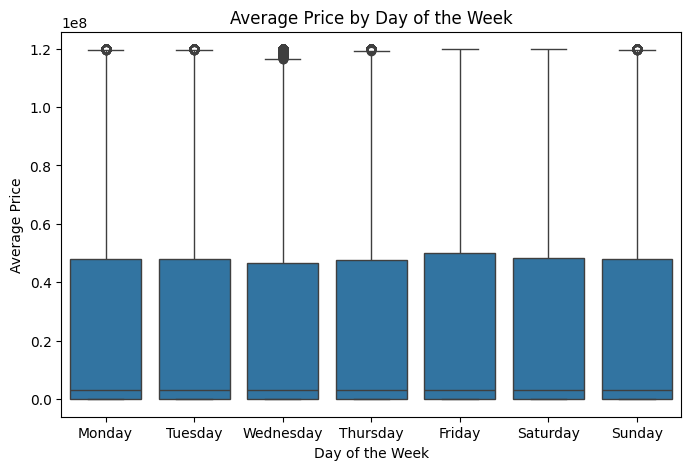

In [244]:

# Check for seasonality (e.g., day of the week)
df['day_of_week'] = df['processed_timestamp'].dt.day_name()
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day_of_week', y='average_price', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Average Price by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Price")
plt.show()

Top 5 type_ids by average price:
type_id
61183    1.197993e+08
15162    1.197993e+08
46274    1.197993e+08
46273    1.197993e+08
31308    1.197993e+08
Name: average_price, dtype: float64


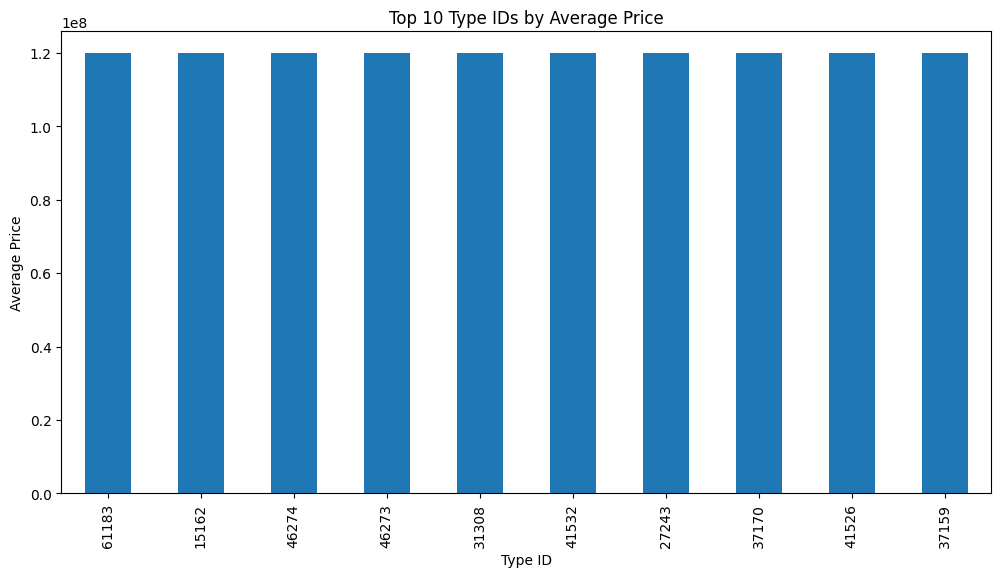

In [245]:
# Average price by type_id
type_id_avg_price = df.groupby('type_id')['average_price'].mean().sort_values(ascending=False)
print("Top 5 type_ids by average price:")
print(type_id_avg_price.head())

# Plot average price by type_id (top 10)
plt.figure(figsize=(12, 6))
type_id_avg_price.head(10).plot(kind='bar')
plt.title("Top 10 Type IDs by Average Price")
plt.xlabel("Type ID")
plt.ylabel("Average Price")
plt.show()

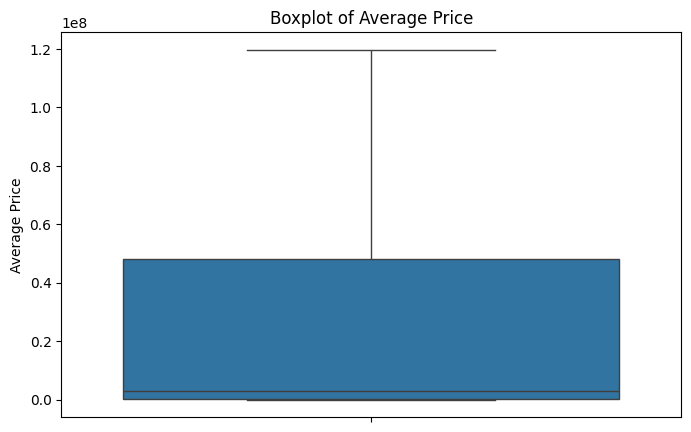

Number of outliers in average_price: 0


In [246]:
# Boxplot for average_price
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='average_price')
plt.title("Boxplot of Average Price")
plt.ylabel("Average Price")
plt.show()

# Identify rows with extreme outliers
q1 = df['average_price'].quantile(0.25)
q3 = df['average_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['average_price'] < lower_bound) | (df['average_price'] > upper_bound)]
print(f"Number of outliers in average_price: {outliers.shape[0]}")

# Basic clean up

In [236]:
# Drop duplicates
df.drop_duplicates(subset=["processed_timestamp","type_id"], inplace=True)

In [237]:
# Cut the maximum price to 1.5 times the 90th percentile
q1 = df['average_price'].quantile(0.25)
q3 = df['average_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df.loc[df['average_price'] > upper_bound, 'average_price'] = upper_bound